In [3]:
import meep as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append('../../..')
from meep_metamaterials.lithography import lithography as lt

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


We used 285 nm pixels with a dwell time of 2 us, which is a speed of 142 mm/s.

In [4]:
powers = np.linspace(0.1, 1, 8) # Range of powers
speeds = np.linspace(10, 160, 8) # Range of speeds in mm/s

pixel_size = 285e-6 # 500 nm (size in mm)
pixel_size = 0.6e-3
dwell_time = 2e-6 # Dwell time in s
dz = 1e-3 # 1 um

T = 0.6 # Period in mm
w = 0.3 # Width in mm
t = 10e-3 # Thickness in mm

gel_size = 10 # Size of gel in mm

x_aspect = 0.1

In [5]:
# Scale to match the printer window width
w = w/x_aspect
pixel_size = pixel_size/x_aspect

In [6]:
block = mp.Block(mp.Vector3(w,w,t))

n, m = len(powers), len(speeds)
i, j = 0, 0
mat = lt.draw_block(block, 0, 0, speed=1, power=1, dx=pixel_size, dz=dz)

In [7]:
M = pd.DataFrame(columns=['xi', 'yi', 'pi', 'xf', 'yf', 'pf', 't', 'X', 'Y', 'Z'])

# Pmax = 0.3 # Maximum power in W

n, m = len(powers), len(speeds)
i, j = 0, 0
for pwr in powers:
    for speed in speeds:
        mt = mat.copy()

        mt['t'] = w*x_aspect/speed
        mt['pi'] = pwr
        mt['pf'] = pwr
        x_offset = (i-n/2+1/2) * T
        y_offset = (j-m/2+1/2) * T

        mt['X'] = mt['X'] + x_offset
        mt['Y'] = mt['Y'] + y_offset

        j += 1
        M = pd.concat([M, mt])
        
    j = 0
    i += 1

In [8]:
# Total time
print(M['t'].sum()/3600, 'h')
print(M['t'].sum()/60, 'min')

0.7210480955475732 h
43.26288573285439 min


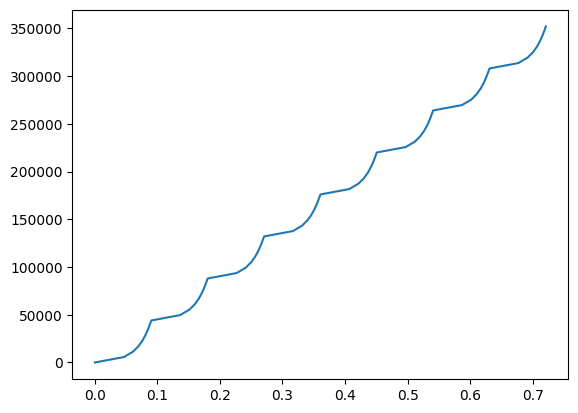

In [9]:
a = np.array(M['t'])
# Accumulated values
b = np.cumsum(a)/3600
plt.plot(b, np.arange(len(a)))

In [10]:
M['X'] = M['X'] - 2
M['Y'] = M['Y'] - 2

lt.save_to_matlab(M, 'part1.mat')

In [11]:
M

,xi,yi,pi,xf,yf,pf,t,X,Y,Z
0,-1.500,-1.5,0.1,-1.500,1.5,0.1,0.030000,-4.1,-4.1,-0.005
0,-1.494,-1.5,0.1,-1.494,1.5,0.1,0.030000,-4.1,-4.1,-0.005
0,-1.488,-1.5,0.1,-1.488,1.5,0.1,0.030000,-4.1,-4.1,-0.005
0,-1.482,-1.5,0.1,-1.482,1.5,0.1,0.030000,-4.1,-4.1,-0.005
0,-1.476,-1.5,0.1,-1.476,1.5,0.1,0.030000,-4.1,-4.1,-0.005
...,...,...,...,...,...,...,...,...,...,...
0,1.470,-1.5,1.0,1.470,1.5,1.0,0.001875,0.1,0.1,0.005
0,1.476,-1.5,1.0,1.476,1.5,1.0,0.001875,0.1,0.1,0.005
0,1.482,-1.5,1.0,1.482,1.5,1.0,0.001875,0.1,0.1,0.005
0,1.488,-1.5,1.0,1.488,1.5,1.0,0.001875,0.1,0.1,0.005


Text(0, 0.5, 'Speed (cm/s)')

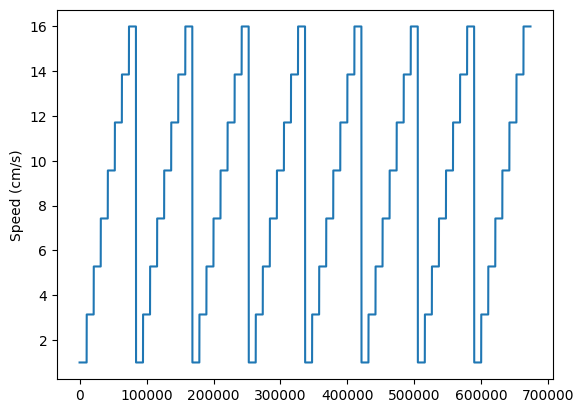

In [39]:
plt.plot(w/100/np.array(M['t']))
plt.ylabel('Speed (cm/s)')

In [40]:
xi = np.array(M['xi'])
yi = np.array(M['yi'])
xf = np.array(M['xf'])
yf = np.array(M['yf'])
pi = np.array(M['pi']) # Power
Z = np.array(M['Z']) # Z coordinate

for i in range(100000):
    plt.plot([xi[i], xf[i]], [yi[i], yf[i]], 'k-')
plt.axis('equal')

(-1.6497675000000007,
 1.6451175000000213,
 -1.6499999999999997,
 1.6499999999999997)

Error in callback <function flush_figures at 0x7feebb659ab0> (for post_execute):


KeyboardInterrupt: 

---
Big square

In [ ]:
square = mp.Block(mp.Vector3(10,10,2))
pixel_size = 0.02
bs = lt.draw_block(block, 0, 0, speed=1, power=1, dx=pixel_size, dz=pixel_size/10, lightweight=True)
bs['t'] = 0.01
bs['pi'] = 1
bs['pf'] = 1
lt.save_to_matlab(bs, 'square.mat')

---
Inspect printing

In [12]:
M = lt.load_from_matlab('combined.mat', 'data')
# M = lt.load_from_matlab('../instructions/PowerTest_and_Grating_20228815754.mat', 'patterncmd')

In [13]:
M

,xi,yi,pi,xf,yf,pf,t,X,Y,Z
0,-1.50000,-1.5,0.1,-1.50000,1.5,0.1,0.030,-4.1,-4.1,-0.005
1,-1.49400,-1.5,0.1,-1.49400,1.5,0.1,0.030,-4.1,-4.1,-0.005
2,-1.48800,-1.5,0.1,-1.48800,1.5,0.1,0.030,-4.1,-4.1,-0.005
3,-1.48200,-1.5,0.1,-1.48200,1.5,0.1,0.030,-4.1,-4.1,-0.005
4,-1.47600,-1.5,0.1,-1.47600,1.5,0.1,0.030,-4.1,-4.1,-0.005
...,...,...,...,...,...,...,...,...,...,...
1243805,0.48610,-2.0,1.0,0.48610,2.0,1.0,0.008,0.9,3.0,0.025
1243806,0.48895,-2.0,1.0,0.48895,2.0,1.0,0.008,0.9,3.0,0.025
1243807,0.49180,-2.0,1.0,0.49180,2.0,1.0,0.008,0.9,3.0,0.025
1243808,0.49465,-2.0,1.0,0.49465,2.0,1.0,0.008,0.9,3.0,0.025


Text(0, 0.5, 'Speed (cm/s)')

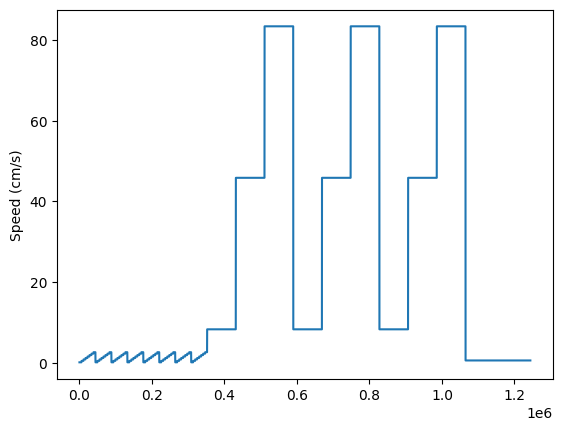

In [14]:
plt.plot(0.5/100/np.array(M['t']))
plt.ylabel('Speed (cm/s)')

In [15]:
# Total time
print(M['t'].sum()/3600, 'h')
print(M['t'].sum()/60, 'min')

1.1696080955475718 h
70.17648573285432 min
